In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")


In [24]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [25]:
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [26]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [48]:
# Create a session
session = Session(engine)

In [55]:
# Display the first row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x185d869eb90>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [63]:
#for row in session.query(Measurement).limit(5).all():
for row in session.query(Measurement.id,Measurement.station,Measurement.prcp,Measurement.tobs).limit(5).all():
    print(row)


(1, 'USC00519397', 0.08, 65.0)
(2, 'USC00519397', 0.0, 63.0)
(3, 'USC00519397', 0.0, 74.0)
(4, 'USC00519397', 0.0, 76.0)
(5, 'USC00519397', None, 73.0)


# Exploratory Precipitation Analysis

In [140]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date                                      
print(latest_date)

2017-08-23


In [131]:
#last_twelve_mths =dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days = 365)
last_twelve_mths = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_twelve_mths

datetime.date(2016, 8, 23)

In [249]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
prcp_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_twelve_mths ).all()
      
prcp_results   

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [250]:
                  
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_results,columns=['Date','percipitation'])

prcp_df



,Date,percipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [252]:
# Sort the dataframe by date
prcp_df= prcp_df.sort_values(by=['Date'])
prcp_df



,Date,percipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1528,2017-08-23,0.08
1008,2017-08-23,0.00
360,2017-08-23,0.00


Text(0, 0.5, 'Inches')

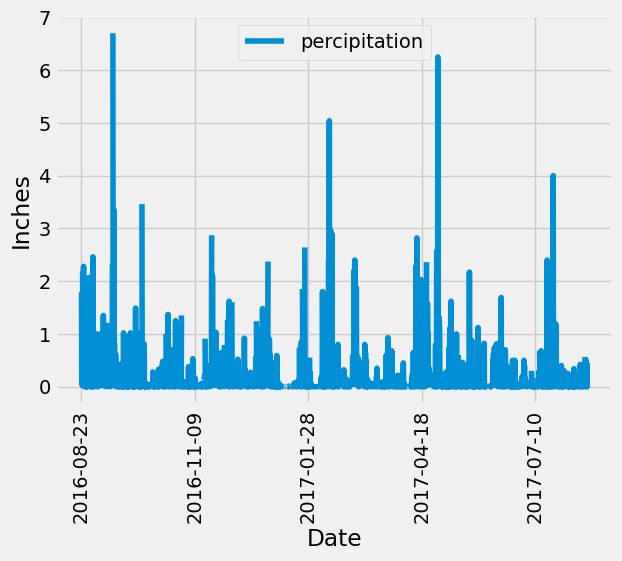

In [253]:
#prcp_df.plot(x='Date', y='percipitation', rot=90)
prcp_df.plot(x='Date', y='percipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [254]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df[['percipitation']].describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [255]:
# Design a query to calculate the total number of stations in the dataset
row = session.query(Station).count()
print(row)

9


In [256]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_active_station = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

most_active_station



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [257]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
best_station = most_active_station[0][0]
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == best_station).all()



[(54.0, 85.0, 71.66378066378067)]

In [258]:
# Using the most active station id find the latest date for the station
active_sta_latest_dt =session.query(func.max(Measurement.date)).filter((Measurement.station)== best_station).first()
active_sta_latest_dt

('2017-08-18',)

In [259]:
#Using the most active station id find the latest date find the 12 months prior date
date_before_year=dt.date(2017, 8, 18) - dt.timedelta(days=365)
date_before_year

datetime.date(2016, 8, 18)

In [260]:
# Using the most active station id 
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
best_station_temp = session.query(Measurement.station, (Measurement.tobs)).\
    filter((Measurement.station)== best_station,Measurement.date >= date_before_year ).all()
best_station_temp

[('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 81.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281',

In [261]:
tobs_df = pd.DataFrame(best_station_temp)
tobs_df.set_index('station')

,tobs
station,
USC00519281,80.0
USC00519281,79.0
USC00519281,81.0
USC00519281,79.0
USC00519281,78.0
...,...
USC00519281,77.0
USC00519281,77.0
USC00519281,76.0


<function matplotlib.pyplot.show(close=None, block=None)>

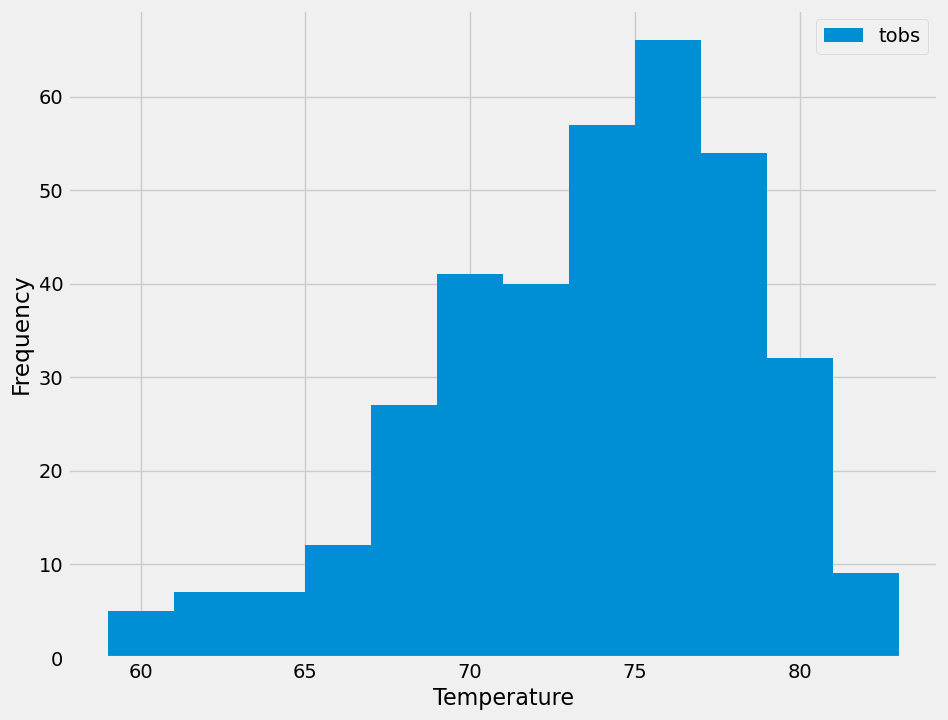

In [262]:
# Using the most active station id

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Plot the results as a histogram with bins=12.
tobs_df.plot.hist(bins=12, figsize=(10,8))
plt.xlabel("Temperature", fontsize=16)
plt.ylabel("Frequency")
plt.show


# Close Session

In [263]:
# Close Session
session.close()